In [7]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset Titanic
df = sns.load_dataset("titanic")

# Ver primeras filas
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# Información General
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
# Estadisticas numéricas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Conteo de valores Nulos
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

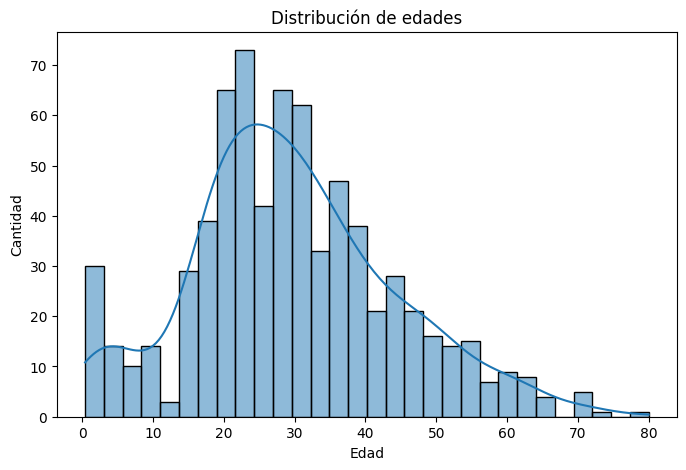

In [19]:
# Distribución de edades
plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

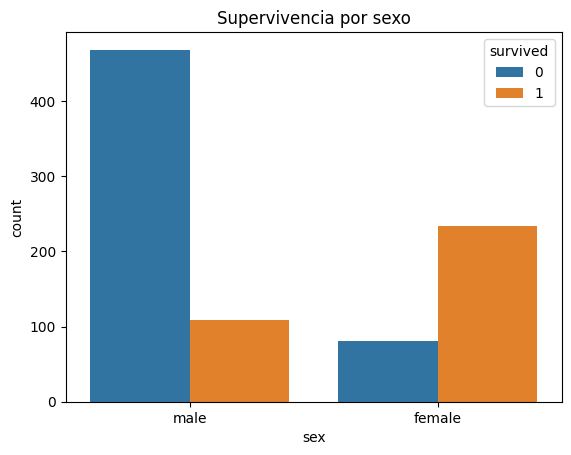

In [20]:
# Supervivencia por sexo
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Supervivencia por sexo")
plt.show()


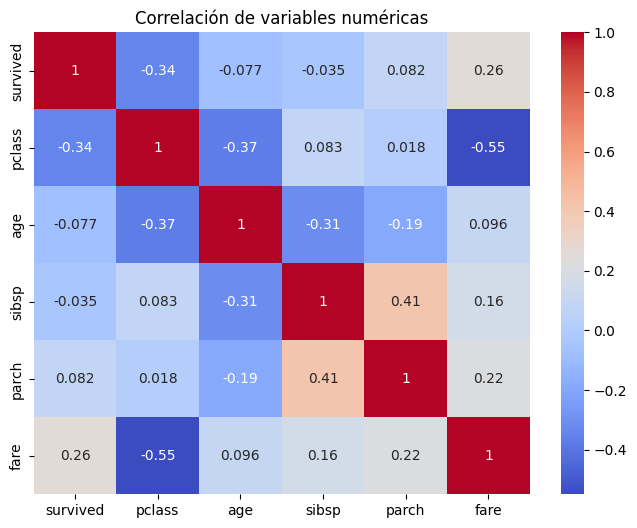

In [22]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Graficar la correlación
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación de variables numéricas")
plt.show()


In [23]:
print("Observaciones de la correlación:")
print("- Fare y survived tienen correlación positiva baja, pasajeros con tickets caros sobrevivieron más.")
print("- SibSp y parch tienen correlación moderada, familias viajaban juntas.")
print("- Age tiene baja correlación con survived, la edad no fue determinante.")


Observaciones de la correlación:
- Fare y survived tienen correlación positiva baja, pasajeros con tickets caros sobrevivieron más.
- SibSp y parch tienen correlación moderada, familias viajaban juntas.
- Age tiene baja correlación con survived, la edad no fue determinante.


In [24]:
# ==============================
# Mini resumen del análisis
# ==============================

print("===== Resumen del Análisis del Dataset Titanic =====\n")

# Información general
print("1. Exploración de datos:")
print("- Número de filas y columnas:", df.shape)
print("- Columnas y tipos de datos:\n", df.dtypes, "\n")
print("- Valores nulos por columna:\n", df.isnull().sum(), "\n")

# Estadísticas descriptivas de variables numéricas
print("2. Estadísticas descriptivas de variables numéricas:")
print(df.describe(), "\n")

# Observaciones sobre correlación
print("3. Observaciones de la correlación:")
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
print("- Fare y survived tienen correlación positiva baja, indicando que pasajeros con tickets más caros sobrevivieron ligeramente más.")
print("- SibSp y parch tienen correlación moderada positiva, mostrando que los pasajeros viajaban en familias combinadas.")
print("- Age tiene baja correlación con survived, sugiriendo que la edad no fue determinante en la supervivencia.\n")

# Observaciones generales
print("4. Observaciones generales:")
print("- La mayoría de pasajeros son adultos.")
print("- Hay más hombres que mujeres, y las mujeres tienen mayor probabilidad de supervivencia.")
print("- Las tarifas varían mucho según la clase y el tipo de pasajero.\n")

print("===== Fin del Resumen =====")


===== Resumen del Análisis del Dataset Titanic =====

1. Exploración de datos:
- Número de filas y columnas: (891, 15)
- Columnas y tipos de datos:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object 

- Valores nulos por columna:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64 

2. Estadísticas descriptivas de variables numéricas:
         survived      pclass         age       sibsp       parch        fare
count  891.000